In [1]:
from PIL import Image
from PIL import ImageOps
from PIL import ImageEnhance
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

In [2]:
#Import CSV containing image metadata
metadata = pd.read_csv('/Users/Rajiv/Desktop/Handwritten Letters/letters2.csv')
#Path to image directory
path = '/Users/Rajiv/Desktop/Handwritten Letters/letters2'

#Empty numpy array to hold images
images = np.empty((len(metadata.file.values), 1024))
#Numpy array to hold image labels
labels = np.asarray(metadata.letter.values)


#Iterate over filenames in metadata
i = 0
for filename in metadata.file.values:
    
    #Open image, resize to 32x32, convert to grayscale, and maxmimize contrast
    current = Image.open(path + '/' + filename)
    current = ImageOps.grayscale(current)
    current = ImageOps.autocontrast(current)
    current = current.resize((32, 32))
    
    #Add image to numpy array
    images[i] = np.reshape(np.asarray(current), (1024))
    i = i + 1



In [3]:
#Obtain letter labels for heatmap

letters = sorted(list(set(metadata.letter)))
letters

['а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё']

In [4]:
#Determine otsu threshold

threshold = threshold_otsu(images)
threshold

162.861328125

In [5]:
#Split data into training and test set

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from matplotlib.pyplot import imshow
from sklearn.metrics import balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [7]:
#Begin by reducing dimensionality of data using PCA
pca = PCA(n_components = .65)
pca.fit(x_train)

transx = pca.transform(x_train)

0.37362632064956286
0.34199401325336304


Text(0, 0.5, 'Predicted Label')

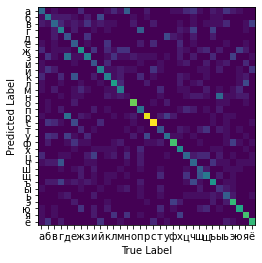

In [8]:
#Train and fit LDA classifier

lda = LinearDiscriminantAnalysis()
lda.fit(transx, y_train)
y_pred = lda.predict(pca.transform(x_test))
print(balanced_accuracy_score(lda.predict(pca.transform(x_train)), y_train))
print(balanced_accuracy_score(y_test, y_pred))

#Plot confusion Matrix
cm = confusion_matrix(y_pred, y_test, labels = letters)


transx2 = lda.transform(pca.transform(x_train))

fig, ax = plt.subplots()
ax.imshow(cm)
ax.set_xticks(np.arange(33))
ax.set_yticks(np.arange(33))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')

In [9]:
#MLP Classifier

ml = MLPClassifier(max_iter = 4000, hidden_layer_sizes = (715, 500, 500, 250, 250))
ml.fit(x_train, y_train)
y_pred = ml.predict(x_test)
balanced_accuracy_score(y_test, y_pred)



y_pred_train = ml.predict(x_train)
balanced_accuracy_score(y_train, y_pred_train)

0.030303030303030304

In [10]:
y_pred = ml.predict(x_test)
balanced_accuracy_score(y_pred, y_test)

/Users/Rajiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.02356902356902357

Text(0, 0.5, 'Predicted Label')

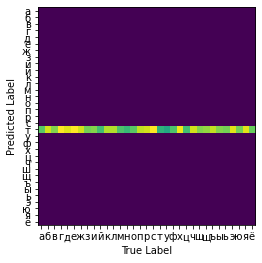

In [11]:
cm = confusion_matrix(y_pred, y_test, labels = letters)

fig, ax = plt.subplots()
ax.imshow(cm)
ax.set_xticks(np.arange(33))
ax.set_yticks(np.arange(33))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')

In [12]:
#KNN Classifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(balanced_accuracy_score(knn.predict(x_train), y_train))

print(balanced_accuracy_score(y_test, y_pred))

0.7421746945041364
0.49625086110049876


Text(0, 0.5, 'Predicted Label')

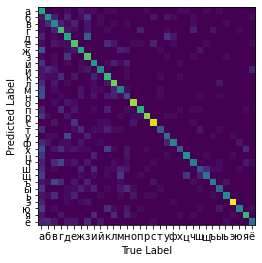

In [13]:
cm = confusion_matrix(y_test, y_pred, labels = letters)

fig, ax = plt.subplots()
ax.imshow(cm)
ax.set_xticks(np.arange(33))
ax.set_yticks(np.arange(33))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
#GNB Classifier

gnb = GaussianNB()
gnb.fit(lda.transform(pca.transform(x_train)), y_train)
y_pred = gnb.predict(lda.transform(pca.transform(x_test)))

print(balanced_accuracy_score(gnb.predict(lda.transform(pca.transform(x_train))), y_train))
print(balanced_accuracy_score(y_test, y_pred))



0.4216408175727379
0.36854090265986483


Text(0, 0.5, 'Predicted Label')

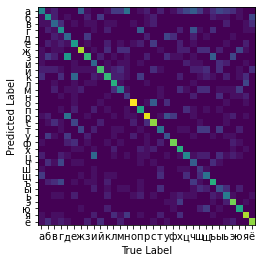

In [16]:


cm = confusion_matrix(y_pred, y_test, labels = letters)

fig, ax = plt.subplots()
ax.imshow(cm)
ax.set_xticks(np.arange(33))
ax.set_yticks(np.arange(33))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')